**# Land Cover Classification of RGB Satellite Images**

In [ ]:
#Import needed libraries
import os, shutil
from PIL import Image, ImageOps

#Standard Libraries
import numpy as np
import pandas as pd

# Visualizations
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, classification_report, ConfusionMatrixDisplay

#TensorFlow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
from keras import models, layers, optimizers, regularizers
from tensorflow.keras import Model
from tensorflow.data.experimental import cardinality
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # creates densely connected layer object
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array
from tensorflow.keras.layers import Conv2D # convolution layer
from tensorflow.keras.layers import MaxPooling2D # max pooling layer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#Transfer Learning
from keras.applications import ResNet50, VGG19, VGG16

In [ ]:
tf_version = tf.__version__
print(tf_version)

2.19.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
%cd /content/drive/MyDrive/NIRMAN_FILES/

/content/drive/MyDrive/NIRMAN_FILES


In [ ]:
!ls

data	      EuroSAT_MS.zip	   EuroSAT_RGB.zip
EuroSAT_data  EuroSAT_RGB_from_MS  Nirman_Datasets


In [ ]:
!unzip EuroSAT_RGB.zip -d EuroSAT_RGB

Streaming output truncated to the last 5000 lines.
  inflating: EuroSAT_RGB/EuroSAT_RGB/Residential/Residential_489.jpg  
  inflating: EuroSAT_RGB/EuroSAT_RGB/Residential/Residential_1573.jpg  
  inflating: EuroSAT_RGB/EuroSAT_RGB/Residential/Residential_270.jpg  
  inflating: EuroSAT_RGB/EuroSAT_RGB/Residential/Residential_516.jpg  
  inflating: EuroSAT_RGB/EuroSAT_RGB/Residential/Residential_2683.jpg  
  inflating: EuroSAT_RGB/EuroSAT_RGB/Residential/Residential_502.jpg  
  inflating: EuroSAT_RGB/EuroSAT_RGB/Residential/Residential_2697.jpg  
  inflating: EuroSAT_RGB/EuroSAT_RGB/Residential/Residential_264.jpg  
  inflating: EuroSAT_RGB/EuroSAT_RGB/Residential/Residential_2867.jpg  
  inflating: EuroSAT_RGB/EuroSAT_RGB/Residential/Residential_2873.jpg  
  inflating: EuroSAT_RGB/EuroSAT_RGB/Residential/Residential_258.jpg  
  inflating: EuroSAT_RGB/EuroSAT_RGB/Residential/Residential_2126.jpg  
  inflating: EuroSAT_RGB/EuroSAT_RGB/Residential/Residential_1349.jpg  
  inflating: EuroSA

In [ ]:
#List image path for all categories
data_AnnualCrop = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_data/EuroSAT_RGB/AnnualCrop'
data_Forest = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_data/EuroSAT_RGB/Forest'
data_HerbaceousVegetation = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_data/EuroSAT_RGB/HerbaceousVegetation'
data_Highway = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_data/EuroSAT_RGB/Highway'
data_Industrial = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_data/EuroSAT_RGB/Industrial'
data_Pasture = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_data/EuroSAT_RGB/Pasture'
data_PermanentCrop = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_data/EuroSAT_RGB/PermanentCrop'
data_Residential = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_data/EuroSAT_RGB/Residential'
data_River = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_data/EuroSAT_RGB/River'
data_SeaLake = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_data/EuroSAT_RGB/SeaLake'


new_dir = '/content/drive/MyDrive/NIRMAN_FILES/data_rgb/split/'


In [ ]:
#Create objects that store all the relevant image names.
imgs_AnnualCrop = [file for file in os.listdir(data_AnnualCrop) if file.endswith('.jpg')]
imgs_Forest = [file for file in os.listdir(data_Forest) if file.endswith('.jpg')]
imgs_HerbaceousVegetation = [file for file in os.listdir(data_HerbaceousVegetation) if file.endswith('.jpg')]
imgs_Highway = [file for file in os.listdir(data_Highway) if file.endswith('.jpg')]
imgs_Industrial = [file for file in os.listdir(data_Industrial) if file.endswith('.jpg')]
imgs_Pasture = [file for file in os.listdir(data_Pasture) if file.endswith('.jpg')]
imgs_PermanentCrop = [file for file in os.listdir(data_PermanentCrop) if file.endswith('.jpg')]
imgs_Residential = [file for file in os.listdir(data_Residential) if file.endswith('.jpg')]
imgs_River = [file for file in os.listdir(data_River) if file.endswith('.jpg')]
imgs_SeaLake = [file for file in os.listdir(data_SeaLake) if file.endswith('.jpg')]

In [ ]:
os.makedirs(new_dir, exist_ok=True)
print(f"Directory '{new_dir}' ensured to exist.")

Directory '/content/drive/MyDrive/NIRMAN_FILES/data_rgb/split/' ensured to exist.


In [ ]:
data_AnnualCrop = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/AnnualCrop'
data_Forest = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/Forest'
data_HerbaceousVegetation = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/HerbaceousVegetation'
data_Highway = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/Highway'
data_Industrial = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/Industrial'
data_Pasture = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/Pasture'
data_PermanentCrop = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/PermanentCrop'
data_Residential = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/Residential'
data_River = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/River'
data_SeaLake = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/SeaLake'

print("Corrected paths for RGB image categories.")

Corrected paths for RGB image categories.


In [ ]:
imgs_AnnualCrop = [file for file in os.listdir(data_AnnualCrop) if file.endswith('.jpg')]
imgs_Forest = [file for file in os.listdir(data_Forest) if file.endswith('.jpg')]
imgs_HerbaceousVegetation = [file for file in os.listdir(data_HerbaceousVegetation) if file.endswith('.jpg')]
imgs_Highway = [file for file in os.listdir(data_Highway) if file.endswith('.jpg')]
imgs_Industrial = [file for file in os.listdir(data_Industrial) if file.endswith('.jpg')]
imgs_Pasture = [file for file in os.listdir(data_Pasture) if file.endswith('.jpg')]
imgs_PermanentCrop = [file for file in os.listdir(data_PermanentCrop) if file.endswith('.jpg')]
imgs_Residential = [file for file in os.listdir(data_Residential) if file.endswith('.jpg')]
imgs_River = [file for file in os.listdir(data_River) if file.endswith('.jpg')]
imgs_SeaLake = [file for file in os.listdir(data_SeaLake) if file.endswith('.jpg')]

print("Updated image file lists based on corrected paths.")

Updated image file lists based on corrected paths.


In [ ]:
categories = [
    'AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial',
    'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake'
]
splits = ['train', 'validation', 'test']

base_split_dir = new_dir # This is '/content/drive/MyDrive/NIRMAN_FILES/data_rgb/split/'

for split in splits:
    for category in categories:
        path = os.path.join(base_split_dir, split, category)
        os.makedirs(path, exist_ok=True)
        print(f"Ensured directory: {path}")

print("Created directory structure for train, validation, and test sets for all categories.")

Ensured directory: /content/drive/MyDrive/NIRMAN_FILES/data_rgb/split/train/AnnualCrop
Ensured directory: /content/drive/MyDrive/NIRMAN_FILES/data_rgb/split/train/Forest
Ensured directory: /content/drive/MyDrive/NIRMAN_FILES/data_rgb/split/train/HerbaceousVegetation
Ensured directory: /content/drive/MyDrive/NIRMAN_FILES/data_rgb/split/train/Highway
Ensured directory: /content/drive/MyDrive/NIRMAN_FILES/data_rgb/split/train/Industrial
Ensured directory: /content/drive/MyDrive/NIRMAN_FILES/data_rgb/split/train/Pasture
Ensured directory: /content/drive/MyDrive/NIRMAN_FILES/data_rgb/split/train/PermanentCrop
Ensured directory: /content/drive/MyDrive/NIRMAN_FILES/data_rgb/split/train/Residential
Ensured directory: /content/drive/MyDrive/NIRMAN_FILES/data_rgb/split/train/River
Ensured directory: /content/drive/MyDrive/NIRMAN_FILES/data_rgb/split/train/SeaLake
Ensured directory: /content/drive/MyDrive/NIRMAN_FILES/data_rgb/split/validation/AnnualCrop
Ensured directory: /content/drive/MyDrive/

**Reasoning**:
The directory structure for the split dataset has been created. The next step is to populate these directories by splitting the images from their original folders into training, validation, and test sets. This requires defining split ratios and then copying the images accordingly.



In [ ]:
train_ratio = 0.7
validation_ratio = 0.20
test_ratio = 0.10

# Dictionary mapping category names to their respective image lists and original data paths
category_data = {
    'AnnualCrop': {'imgs': imgs_AnnualCrop, 'path': data_AnnualCrop},
    'Forest': {'imgs': imgs_Forest, 'path': data_Forest},
    'HerbaceousVegetation': {'imgs': imgs_HerbaceousVegetation, 'path': data_HerbaceousVegetation},
    'Highway': {'imgs': imgs_Highway, 'path': data_Highway},
    'Industrial': {'imgs': imgs_Industrial, 'path': data_Industrial},
    'Pasture': {'imgs': imgs_Pasture, 'path': data_Pasture},
    'PermanentCrop': {'imgs': imgs_PermanentCrop, 'path': data_PermanentCrop},
    'Residential': {'imgs': imgs_Residential, 'path': data_Residential},
    'River': {'imgs': imgs_River, 'path': data_River},
    'SeaLake': {'imgs': imgs_SeaLake, 'path': data_SeaLake}
}

base_split_dir = new_dir

print("Starting data splitting and copying...")

for category, data in category_data.items():
    all_images = data['imgs']
    original_path = data['path']
    np.random.shuffle(all_images) # Shuffle images for random splitting

    num_images = len(all_images)
    num_train = int(train_ratio * num_images)
    num_validation = int(validation_ratio * num_images)

    train_images = all_images[:num_train]
    validation_images = all_images[num_train : num_train + num_validation]
    test_images = all_images[num_train + num_validation:]

    # Copy images to respective directories
    for img in train_images:
        src = os.path.join(original_path, img)
        dst = os.path.join(base_split_dir, 'train', category, img)
        shutil.copyfile(src, dst)
    print(f"Copied {len(train_images)} images to train/{category}")

    for img in validation_images:
        src = os.path.join(original_path, img)
        dst = os.path.join(base_split_dir, 'validation', category, img)
        shutil.copyfile(src, dst)
    print(f"Copied {len(validation_images)} images to validation/{category}")

    for img in test_images:
        src = os.path.join(original_path, img)
        dst = os.path.join(base_split_dir, 'test', category, img)
        shutil.copyfile(src, dst)
    print(f"Copied {len(test_images)} images to test/{category}")

print("Data splitting and copying complete.")

Starting data splitting and copying...
Copied 2100 images to train/AnnualCrop
Copied 600 images to validation/AnnualCrop
Copied 300 images to test/AnnualCrop
Copied 2100 images to train/Forest
Copied 600 images to validation/Forest
Copied 300 images to test/Forest
Copied 2100 images to train/HerbaceousVegetation
Copied 600 images to validation/HerbaceousVegetation
Copied 300 images to test/HerbaceousVegetation
Copied 1750 images to train/Highway
Copied 500 images to validation/Highway
Copied 250 images to test/Highway
Copied 1750 images to train/Industrial
Copied 500 images to validation/Industrial
Copied 250 images to test/Industrial
Copied 1400 images to train/Pasture
Copied 400 images to validation/Pasture
Copied 200 images to test/Pasture
Copied 1750 images to train/PermanentCrop
Copied 500 images to validation/PermanentCrop
Copied 250 images to test/PermanentCrop
Copied 2100 images to train/Residential
Copied 600 images to validation/Residential
Copied 300 images to test/Residenti

In [ ]:
train_folder = 'data_rgb/split/train'
test_folder = 'data_rgb/split/test'

# Normalize images
train_gen = ImageDataGenerator(rescale=1./255, validation_split = 0.125)
test_gen = ImageDataGenerator(rescale=1./255)

#Import data as 70% Train (10% Validation of orginal data set) and 20% Test
train_generator = train_gen.flow_from_directory(train_folder,
                                                class_mode = 'categorical',
                                                subset ='training',
                                                batch_size=128,
                                                shuffle=True,
                                                seed=42)

val_generator= train_gen.flow_from_directory(train_folder,
                                             class_mode= 'categorical',
                                             subset = "validation",
                                             batch_size=128,
                                             shuffle=True,
                                             seed=42)

test_generator= test_gen.flow_from_directory(test_folder,
                                              class_mode= 'categorical',
                                              batch_size=128,
                                              shuffle=False,
                                              seed=42)

Found 16550 images belonging to 10 classes.
Found 2358 images belonging to 10 classes.
Found 2700 images belonging to 10 classes.


In [ ]:
# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [ ]:
#Confirm class balance for train and test
train_classes = train_generator.classes
val_classes = val_generator.classes
test_classes = test_generator.classes

#Look at image distribution by class across train, test, and validation sets.
train_class, train_count = np.unique(train_classes, return_counts=True)
val_class, val_count = np.unique(val_classes, return_counts=True)
test_class, test_count = np.unique(test_classes, return_counts=True)

print('Train ~ {}'.format(list(zip(train_class, train_count))))
print('Validation ~ {}'.format(list(zip(val_class, val_count))))
print('Test ~ {}'.format(list(zip(test_class, test_count))))

Train ~ [(np.int32(0), np.int64(1845)), (np.int32(1), np.int64(1838)), (np.int32(2), np.int64(1838)), (np.int32(3), np.int64(1532)), (np.int32(4), np.int64(1532)), (np.int32(5), np.int64(1225)), (np.int32(6), np.int64(1532)), (np.int32(7), np.int64(1838)), (np.int32(8), np.int64(1532)), (np.int32(9), np.int64(1838))]
Validation ~ [(np.int32(0), np.int64(263)), (np.int32(1), np.int64(262)), (np.int32(2), np.int64(262)), (np.int32(3), np.int64(218)), (np.int32(4), np.int64(218)), (np.int32(5), np.int64(175)), (np.int32(6), np.int64(218)), (np.int32(7), np.int64(262)), (np.int32(8), np.int64(218)), (np.int32(9), np.int64(262))]
Test ~ [(np.int32(0), np.int64(300)), (np.int32(1), np.int64(300)), (np.int32(2), np.int64(300)), (np.int32(3), np.int64(250)), (np.int32(4), np.int64(250)), (np.int32(5), np.int64(200)), (np.int32(6), np.int64(250)), (np.int32(7), np.int64(300)), (np.int32(8), np.int64(250)), (np.int32(9), np.int64(300))]


In [ ]:
#Checking the classes in our train data
train_class_names = train_generator.class_indices
print('Train:', train_class_names)

#Checking the classes in our validation data
val_class_names = val_generator.class_indices
print('Validation:', val_class_names)

#Checking the classes in our test data
test_class_names = test_generator.class_indices
print('Train:', test_class_names)

Train: {'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}
Validation: {'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}
Train: {'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}


In [ ]:
# Preview the shape of both the images and labels for both the train, validation, and test sets (8 objects total)
print("Train")
print(np.shape(train_images))
print(np.shape(train_labels))
print("Validation")
print(np.shape(val_images))
print(np.shape(val_labels))
print("Test")
print(np.shape(test_images))
print(np.shape(test_labels))

Train
(128, 256, 256, 3)
(128, 10)
Validation
(128, 256, 256, 3)
(128, 10)
Test
(128, 256, 256, 3)
(128, 10)


Below is Preview img of Pasture class.

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


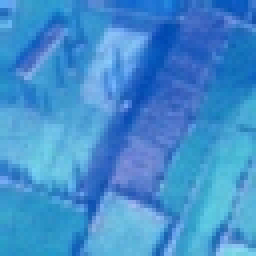

In [ ]:
# Preview a train data image
print(train_labels[0])
array_to_img(train_images[0])

BASELINE

In [ ]:
#Instantiate a Sequential model
baseline_model = Sequential()


# Input Layer- Convolution
baseline_model.add(Conv2D(filters=32,
                          kernel_size=(3, 3),
                          activation='relu',
                          input_shape= (256, 256, 3)))


# Layer 1- max pool in 2x2 window
baseline_model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2- connect all nodes with dense layer
baseline_model.add(Flatten())
baseline_model.add(Dense(64, activation='relu'))

# Output Layer- softmax activiation for multi-categorical with 10 classes
baseline_model.add(Dense(10, activation='softmax'))

#Compile the sequential CNN model- adam optimizer,
# categorical_crossentropy loss, and set our metric to accuracy
baseline_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# print model summary
baseline_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 516128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    33,032,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,033,802 (126.01 MB)

 Trainable params: 33,033,802 (126.01 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fit the model
baseline_history = baseline_model.fit(train_generator,
                                      epochs = 10,
                                      batch_size= 128,
                                      verbose = 1,
                                      validation_data = val_generator)

Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 89s 686ms/step - accuracy: 0.4892 - loss: 1.4019 - val_accuracy: 0.6247 - val_loss: 1.1088
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 84s 646ms/step - accuracy: 0.6500 - loss: 1.0170 - val_accuracy: 0.6972 - val_loss: 0.8680
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 87s 671ms/step - accuracy: 0.7237 - loss: 0.8198 - val_accuracy: 0.7392 - val_loss: 0.8075
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 92s 706ms/step - accuracy: 0.7600 - loss: 0.7024 - val_accuracy: 0.7188 - val_loss: 0.7892
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 94s 725ms/step - accuracy: 0.7877 - loss: 0.6163 - val_accuracy: 0.6862 - val_loss: 0.8329
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 88s 680ms/step - accuracy: 0.8107 - loss: 0.5729 - val_accuracy: 0.7570 - val_loss: 0.6885
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 87s 669ms/step - accuracy: 0.8415 - loss: 0.4878 - val_accuracy: 0.7451 - val_loss: 0.7471
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 87s 667ms/step - accuracy: 0.8590 - loss: 0

In [ ]:
#Check loss and accuracy on test data
test_loss, test_acc = baseline_model.evaluate(test_generator, verbose = 1)

print('Test loss: ', test_loss)
print('Test accuracy: ', test_acc)

22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 616ms/step - accuracy: 0.7888 - loss: 0.6607
Test loss:  0.7407491207122803
Test accuracy:  0.7603703737258911


Our Baseline model overfit with acc of 89.82% in TRAIN and 76.03% in TEST.

**MODEL 1**: ADDITION OF CONV AND MAX POOL LAYERS [DEEPER CNN]

In [ ]:
#Instantiate a Sequential model
model_one = Sequential()


# Input Layer- Convolution
model_one.add(Conv2D(filters=32,
                          kernel_size=(3, 3),
                          activation='relu',
                          input_shape= (256, 256, 3)))


# Layer 1- max pool in 2x2 window
model_one.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2- another convolution layer
model_one.add(layers.Conv2D(32, (3, 3), activation='relu'))

# Layer 3- another max pool layer
model_one.add(layers.MaxPooling2D((2, 2)))

# Layer 4- connect all nodes with dense layer
model_one.add(Flatten())
model_one.add(Dense(64, activation='relu'))

# Output Layer- softmax activiation for multi-categorical with 10 classes
model_one.add(Dense(10, activation='softmax'))

#Compile the sequential CNN model- adam optimizer,
# categorical_crossentropy loss, and set our metric to accuracy
model_one.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# print model summary
model_one.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 125, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     7,872,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,883,370 (30.07 MB)

 Trainable params: 7,883,370 (30.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Define Stopping Criteria
valcallback = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience = 2)


# Fit the model
model_one_history = model_one.fit(train_generator,
                                  epochs= 10,
                                  validation_data = val_generator,
                                  callbacks= valcallback,
                                  batch_size=128,
                                  verbose = 1)

Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 108s 750ms/step - accuracy: 0.1876 - loss: 2.9002 - val_accuracy: 0.4084 - val_loss: 1.5279
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 87s 672ms/step - accuracy: 0.4132 - loss: 1.5079 - val_accuracy: 0.4555 - val_loss: 1.3692
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 92s 707ms/step - accuracy: 0.4980 - loss: 1.3151 - val_accuracy: 0.5721 - val_loss: 1.2072
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 88s 673ms/step - accuracy: 0.6110 - loss: 1.0944 - val_accuracy: 0.6480 - val_loss: 0.9811
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 88s 675ms/step - accuracy: 0.6728 - loss: 0.9237 - val_accuracy: 0.6841 - val_loss: 0.9015
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 86s 664ms/step - accuracy: 0.7194 - loss: 0.7975 - val_accuracy: 0.7146 - val_loss: 0.7969
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 87s 670ms/step - accuracy: 0.7610 - loss: 0.6860 - val_accuracy: 0.6866 - val_loss: 0.8570
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 86s 658ms/step - accuracy: 0.7812 - loss: 

In [ ]:
#Check loss and accuracy on test data
test_loss, test_acc = model_one.evaluate(test_generator, verbose = 1)

print('Test loss: ', test_loss)
print('Test accuracy: ', test_acc)

22/22 ━━━━━━━━━━━━━━━━━━━━ 13s 584ms/step - accuracy: 0.7220 - loss: 0.8120
Test loss:  0.8230937123298645
Test accuracy:  0.720370352268219


Still the model is overfitting with acc of 78.12% in TRAIN and 72.03% in TEST.

**MODEL 2** : L2 REG

In [ ]:
#Instantiate a Sequential model
model_l2 = Sequential()


# Input Layer- Convolution
model_l2.add(Conv2D(filters=32,
                          kernel_size=(3, 3),
                          activation='relu',
                          input_shape= (256, 256, 3),
                     kernel_regularizer=regularizers.l2(0.005)))


# Layer 1- max pool in 2x2 window
model_l2.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2- another convolution layer
model_l2.add(layers.Conv2D(32, (3, 3),
                            activation='relu',
                            kernel_regularizer=regularizers.l2(0.005)))

# Layer 3- another max pool layer
model_l2.add(layers.MaxPooling2D((2, 2)))

# Layer 4- connect all nodes with dense layer
model_l2.add(Flatten())
model_l2.add(Dense(64,
                    activation='relu',
                    kernel_regularizer=regularizers.l2(0.005)))

# Output Layer- softmax activiation for multi-categorical with 10 classes
model_l2.add(Dense(10, activation='softmax'))

#Compile the sequential CNN model- adam optimizer,
# categorical_crossentropy loss, and set our metric to accuracy
model_l2.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# print model summary
model_l2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │     7,872,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,883,370 (30.07 MB)

 Trainable params: 7,883,370 (30.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Define Stopping Criteria
valcallback = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience = 2)


# Fit the model
model_l2_history = model_l2.fit(train_generator,
                                  epochs= 10,
                                  validation_data = val_generator,
                                  callbacks= valcallback,
                                  batch_size=128,
                                  verbose = 1)

Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 96s 712ms/step - accuracy: 0.3239 - loss: 2.3516 - val_accuracy: 0.6149 - val_loss: 1.4548
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 87s 672ms/step - accuracy: 0.5834 - loss: 1.4485 - val_accuracy: 0.6069 - val_loss: 1.4208
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 86s 659ms/step - accuracy: 0.6164 - loss: 1.3509 - val_accuracy: 0.6790 - val_loss: 1.1996
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 85s 656ms/step - accuracy: 0.6410 - loss: 1.2758 - val_accuracy: 0.6544 - val_loss: 1.2257
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 86s 663ms/step - accuracy: 0.6628 - loss: 1.2045 - val_accuracy: 0.6930 - val_loss: 1.0910
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 89s 682ms/step - accuracy: 0.6727 - loss: 1.1546 - val_accuracy: 0.6798 - val_loss: 1.1718
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 87s 671ms/step - accuracy: 0.6822 - loss: 1.1411 - val_accuracy: 0.6166 - val_loss: 1.2287
Epoch 7: early stopping


In [ ]:
#Check loss and accuracy on test data
test_loss, test_acc = model_l2.evaluate(test_generator, verbose = 1)

print('Test loss: ', test_loss)
print('Test accuracy: ', test_acc)

22/22 ━━━━━━━━━━━━━━━━━━━━ 13s 571ms/step - accuracy: 0.6343 - loss: 1.2291
Test loss:  1.2483681440353394
Test accuracy:  0.6100000143051147


Model Performed well with higher validation.

**Model 3**- Transfer Learning: VGG19 with Augmentation and Regularization

In [ ]:
train_folder = '/content/drive/MyDrive/NIRMAN_FILES/data_rgb/split/train'
test_folder = '/content/drive/MyDrive/NIRMAN_FILES/data_rgb/split/test'

# Normalize images and Augment with Horizontal and Vertical Flips
aug_train_gen = ImageDataGenerator(rescale=1./255,
                               horizontal_flip=True,
                               vertical_flip=True,
                               validation_split = 0.125,
                               preprocessing_function = tf.keras.applications.vgg19.preprocess_input)

aug_val_gen = ImageDataGenerator(rescale=1./255,
                                 validation_split = 0.125,
                                 preprocessing_function = tf.keras.applications.vgg19.preprocess_input)

# Corrected: Removed 'test_split' argument and added target_size
aug_test_gen = ImageDataGenerator(rescale=1./255,
                                 preprocessing_function = tf.keras.applications.vgg19.preprocess_input)


#Augment the train data
aug_train_generator = aug_train_gen.flow_from_directory(train_folder,
                                                class_mode = 'categorical',
                                                subset ='training',
                                                target_size=(256, 256),
                                                batch_size=128,
                                                shuffle=False,
                                                seed=42)

aug_val_generator= aug_val_gen.flow_from_directory(train_folder,
                                                   class_mode= 'categorical',
                                                   subset = "validation",
                                                   target_size=(256, 256),
                                                   batch_size=128,
                                                   shuffle=False,
                                                   seed=42)

aug_test_generator= aug_test_gen.flow_from_directory(test_folder,
                                              class_mode= 'categorical',
                                              target_size=(256, 256),
                                              batch_size=128,
                                              shuffle=False,
                                              seed=42)

Found 16550 images belonging to 10 classes.
Found 2358 images belonging to 10 classes.
Found 2700 images belonging to 10 classes.


In [ ]:
#Reshape our input
vgg19 = VGG19(weights='imagenet',
              include_top=False,
              input_shape=(256, 256, 3))

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
vgg19.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Instantiate a Sequential model
aug_vgg_model = Sequential()

#Input Layer
aug_vgg_model.add(vgg19)

aug_vgg_model.add(layers.Flatten())

#Add Dense Layer
aug_vgg_model.add(layers.Dense(512, activation='relu'))
aug_vgg_model.add(layers.Dropout(0.2))

#Add Dense Layer
aug_vgg_model.add(layers.Dense(256, activation='relu'))
aug_vgg_model.add(layers.Dropout(0.2))

#Add Dense Layer
aug_vgg_model.add(layers.Dense(128, activation='relu'))
aug_vgg_model.add(layers.Dropout(0.2))

#Add Dense Layer
aug_vgg_model.add(layers.Dense(64, activation='relu'))
aug_vgg_model.add(layers.Dropout(0.2))

#Add Dense Layer
aug_vgg_model.add(layers.Dense(32, activation='relu'))

#Output Layer
aug_vgg_model.add(layers.Dense(10, activation='softmax'))





# Check whether a layer is trainable (or alter its setting) through the layer.trainable attribute
for layer in aug_vgg_model.layers:
    print(layer.name, layer.trainable)

# Similarly, you can check how many trainable weights are in the model
print(len(aug_vgg_model.trainable_weights))

vgg19 True
flatten_3 True
dense_6 True
dropout True
dense_7 True
dropout_1 True
dense_8 True
dropout_2 True
dense_9 True
dropout_3 True
dense_10 True
dense_11 True
44


In [ ]:
#Freeze our VGG19 Layer
vgg19.trainable = False

#Sanity check that VGG19 Layer is frozen
for layer in aug_vgg_model.layers:
    print(layer.name, layer.trainable)

vgg19 False
flatten_3 True
dense_6 True
dropout True
dense_7 True
dropout_1 True
dense_8 True
dropout_2 True
dense_9 True
dropout_3 True
dense_10 True
dense_11 True


In [ ]:
#Compile the model- adam optimizer, categorical_crossentropy loss, and set our metric to accuracy
aug_vgg_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# print model summary
aug_vgg_model.summary()

# Define Stopping Criteria

valcallback = [EarlyStopping(monitor='val_accuracy', mode='max', verbose = 1, patience = 5),
               ModelCheckpoint(filepath='/content/drive/MyDrive/NIRMAN_FILES/Nirman_Datasets/aug_vgg19_model.h5',
                               monitor='val_accuracy',
                               save_best_only=True,
                               mode='max')]


# Fit the model
aug_vgg_model_history = aug_vgg_model.fit(aug_train_generator,
                                  epochs= 10,
                                  validation_data = aug_val_generator,
                                  callbacks= valcallback,
                                  batch_size=128,
                                  verbose = 1)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 8, 8, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,977,002 (141.06 MB)

 Trainable params: 16,952,618 (64.67 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1087 - loss: 3.0429

130/130 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.1089 - loss: 3.0389 - val_accuracy: 0.2366 - val_loss: 2.1196
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2502 - loss: 2.0725

130/130 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - accuracy: 0.2499 - loss: 2.0727 - val_accuracy: 0.2786 - val_loss: 2.0886
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1817 - loss: 2.0929

130/130 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - accuracy: 0.1818 - loss: 2.0925 - val_accuracy: 0.2863 - val_loss: 1.8310
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.1955 - loss: 1.9446 - val_accuracy: 0.2727 - val_loss: 1.7930
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2706 - loss: 1.8543

130/130 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - accuracy: 0.2705 - loss: 1.8539 - val_accuracy: 0.3507 - val_loss: 1.6263
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.3174 - loss: 1.6997 - val_accuracy: 0.3321 - val_loss: 1.6683
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2845 - loss: 1.6812

130/130 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.2845 - loss: 1.6812 - val_accuracy: 0.3872 - val_loss: 1.5630
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3229 - loss: 1.6707

130/130 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - accuracy: 0.3228 - loss: 1.6709 - val_accuracy: 0.4313 - val_loss: 1.5634
Epoch 9/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.3105 - loss: 1.6987 - val_accuracy: 0.4279 - val_loss: 1.5053
Epoch 10/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.3284 - loss: 1.6141 - val_accuracy: 0.4084 - val_loss: 1.4129


In [ ]:
test_loss, test_acc = aug_vgg_model.evaluate(aug_test_generator, verbose = 1)

print('Test loss: ', test_loss)
print('Test accuracy: ', test_acc)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.3966 - loss: 1.4379
Test loss:  1.421622633934021
Test accuracy:  0.40888887643814087
